# Importing

In [ ]:
from google.colab import drive

# Menghubungkan Google Drive ke Google Colab
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [ ]:
df_real = pd.read_csv('/content/drive/MyDrive/rekdat_news/real.csv')
df_fake = pd.read_csv('/content/drive/MyDrive/rekdat_news/fake.csv')

In [ ]:
!pip install scikit-plot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import re
import string
from wordcloud import WordCloud
from collections import Counter

import warnings
warnings.filterwarnings('ignore')

from nltk import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from sklearn.ensemble import RandomForestClassifier
from sklearn import model_selection, svm

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

from scikitplot.metrics import plot_confusion_matrix, plot_roc

# Data Outline

In [ ]:
df_real.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21869 entries, 0 to 21868
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   tweet   21863 non-null  object
dtypes: object(1)
memory usage: 171.0+ KB


In [ ]:
df_fake.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19999 entries, 0 to 19998
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   tweet   19988 non-null  object
dtypes: object(1)
memory usage: 156.4+ KB


In [ ]:
df_real.head()

,tweet
0,sun downs technical director: al-ahly respecte...
1,shawky gharib after the tie with enppi: our go...
2,"egyptian sports news today, wednesday 1/25/202..."
3,the main referees committee of the egyptian fo...
4,"haji bari, the striker of the future team, is ..."


In [ ]:
df_fake.head()

,tweet
0,"the tongue of his condition, now i saw things ..."
1,"by god the great, after i saw the derby of wyd..."
2,"believe in god, this zamalek fans are as good ..."
3,the coach appeared in the media and told the t...
4,asno smito\nwhoever knows her tells me a massa...


# Labeling, Data Merge and Creating New Columns

**1) Labeling 'real' = '0'**

In [ ]:
df_real['label']=0

In [ ]:
df_real.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21869 entries, 0 to 21868
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   tweet   21863 non-null  object
 1   label   21869 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 341.8+ KB


**2) Labeling 'fake' = '1'**

In [ ]:
df_fake['label']=1

**3) Merge two datas**

In [ ]:
df=pd.concat([df_real,df_fake],ignore_index=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41868 entries, 0 to 41867
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   tweet   41851 non-null  object
 1   label   41868 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 654.3+ KB


In [ ]:
df.head()

,tweet,label
0,sun downs technical director: al-ahly respecte...,0
1,shawky gharib after the tie with enppi: our go...,0
2,"egyptian sports news today, wednesday 1/25/202...",0
3,the main referees committee of the egyptian fo...,0
4,"haji bari, the striker of the future team, is ...",0


**4) Drop NaN**

In [ ]:
df=df.dropna()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41851 entries, 0 to 41867
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   tweet   41851 non-null  object
 1   label   41851 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 980.9+ KB


**5) The number by labels**

In [ ]:
df['label'].value_counts()

0    21863
1    19988
Name: label, dtype: int64

**6) Pie and bar plot by 'real' and 'fake'**

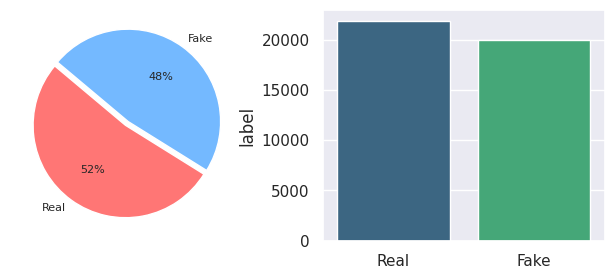

In [ ]:
labels = ['Real', 'Fake']
sizes = [21863, 19988]
custom_colours = ['#ff7675', '#74b9ff']

plt.figure(figsize=(8, 3))
plt.subplot(1, 2, 1)
plt.pie(sizes, labels = labels, textprops={'fontsize': 8}, startangle=140,
       autopct='%1.0f%%', colors=custom_colours, explode=[0, 0.05])

plt.subplot(1, 2, 2)
ax=sns.barplot(x = df['label'].unique(), y = df['label'].value_counts(), palette= 'viridis')
ax.set_xticklabels(labels)

plt.show()

**7) Creating new columns 'Total Words' and 'Total Chars'**

In [ ]:

df['total words'] = df['tweet'].apply(lambda x: len(x.split()))

def count_total_words(text):
    char = 0
    for word in text.split():
        char += len(word)
    return char

df['total chars'] = df["tweet"].apply(count_total_words)

# Text preprocessing

In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

**1) Lowercasing**

In [ ]:
def convert_lowercase(text):
    text = text.lower()
    return text

df['tweet'] = df['tweet'].apply(convert_lowercase)

In [ ]:
df.head()

,tweet,label,total words,total chars
0,sun downs technical director: al-ahly respecte...,0,11,58
1,shawky gharib after the tie with enppi: our go...,0,16,67
2,"egyptian sports news today, wednesday 1/25/202...",0,25,149
3,the main referees committee of the egyptian fo...,0,36,187
4,"haji bari, the striker of the future team, is ...",0,39,196


**2) Removing URLs**

In [ ]:
def remove_url(text):
    re_url = re.compile('https?://\S+|www\.\S+')
    return re_url.sub('', text)

df['tweet'] = df['tweet'].apply(remove_url)

In [ ]:
df.head()

,tweet,label,total words,total chars
0,sun downs technical director: al-ahly respecte...,0,11,58
1,shawky gharib after the tie with enppi: our go...,0,16,67
2,"egyptian sports news today, wednesday 1/25/202...",0,25,149
3,the main referees committee of the egyptian fo...,0,36,187
4,"haji bari, the striker of the future team, is ...",0,39,196


In [ ]:
df['tweet'] = df['tweet'].apply(word_tokenize)

In [ ]:
df.head()

,tweet,label,total words,total chars
0,"[sun, downs, technical, director, :, al-ahly, ...",0,11,58
1,"[shawky, gharib, after, the, tie, with, enppi,...",0,16,67
2,"[egyptian, sports, news, today, ,, wednesday, ...",0,25,149
3,"[the, main, referees, committee, of, the, egyp...",0,36,187
4,"[haji, bari, ,, the, striker, of, the, future,...",0,39,196


**3) Removing Punctuations**

In [ ]:
exclude = string.punctuation

def remove_punc(text):
  data = []
  for word in text:
    data.append(word.translate(str.maketrans('', '', exclude)))
    # return text.translate(str.maketrans('', '', exclude))
  return data

df['tweet'] = df['tweet'].apply(remove_punc)

In [ ]:
df.head()

,tweet,label,total words,total chars
0,"[sun, downs, technical, director, , alahly, re...",0,11,58
1,"[shawky, gharib, after, the, tie, with, enppi,...",0,16,67
2,"[egyptian, sports, news, today, , wednesday, 1...",0,25,149
3,"[the, main, referees, committee, of, the, egyp...",0,36,187
4,"[haji, bari, , the, striker, of, the, future, ...",0,39,196


**4) Removing stopwords**

In [ ]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
def remove_stopwords(text):
    new_list = []
    stopwrds = stopwords.words('english')
    for word in text:
        if word not in stopwrds:
            new_list.append(word)
    return new_list

df['tweet'] = df['tweet'].apply(remove_stopwords)

In [ ]:
df.head()

,tweet,label,total words,total chars
0,"[sun, downs, technical, director, , alahly, re...",0,11,58
1,"[shawky, gharib, tie, enppi, , goal, return, g...",0,16,67
2,"[egyptian, sports, news, today, , wednesday, 1...",0,25,149
3,"[main, referees, committee, egyptian, football...",0,36,187
4,"[haji, bari, , striker, future, team, , underg...",0,39,196


**5) Stemming**

In [ ]:
def perform_stemming(text):
    stemmer = PorterStemmer()
    new_list = []
    for word in text:
        new_list.append(stemmer.stem(word))

    return new_list

df['tweet'] = df['tweet'].apply(perform_stemming)

In [ ]:
df.head()

,tweet,label,total words,total chars
0,"[sun, down, technic, director, , alahli, respe...",0,11,58
1,"[shawki, gharib, tie, enppi, , goal, return, g...",0,16,67
2,"[egyptian, sport, news, today, , wednesday, 12...",0,25,149
3,"[main, refere, committe, egyptian, footbal, as...",0,36,187
4,"[haji, bari, , striker, futur, team, , undergo...",0,39,196


In [ ]:
df['tweet'] = df['tweet'].apply(lambda x: ' '.join(x))

In [ ]:
df.head()

,tweet,label,total words,total chars
0,sun down technic director alahli respect us p...,0,11,58
1,shawki gharib tie enppi goal return golden squar,0,16,67
2,egyptian sport news today wednesday 1252023 ...,0,25,149
3,main refere committe egyptian footbal associ c...,0,36,187
4,haji bari striker futur team undergo final t...,0,39,196


**6) Creating new column 'Total Words After Transformation'**

In [ ]:
df['Total Words After Transformation'] = df['tweet'].apply(lambda x: np.log(len(x.split())))

In [ ]:
df.head()

,tweet,label,total words,total chars,Total Words After Transformation
0,sun down technic director alahli respect us p...,0,11,58,2.197225
1,shawki gharib tie enppi goal return golden squar,0,16,67,2.079442
2,egyptian sport news today wednesday 1252023 ...,0,25,149,2.890372
3,main refere committe egyptian footbal associ c...,0,36,187,3.044522
4,haji bari striker futur team undergo final t...,0,39,196,3.044522


# Modeling

**1) Naive Bayes**

In [ ]:
X = df["tweet"]
y = df['label'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 42, stratify = y)

In [ ]:
tfidf = TfidfVectorizer(max_features= 2500, min_df= 2)
X_train = tfidf.fit_transform(X_train).toarray()
X_test = tfidf.transform(X_test).toarray()

In [ ]:
X_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
def train_model(model):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)
    accuracy = round(accuracy_score(y_test, y_pred), 3)
    precision = round(precision_score(y_test, y_pred), 3)
    recall = round(recall_score(y_test, y_pred), 3)
    f1score = round(f1_score(y_test, y_pred), 3)

    print(f'Accuracy of the model: {accuracy}')
    print(f'Precision Score of the model: {precision}')
    print(f'Recall Score of the model: {recall}')
    print(f'f1-score of the model: {f1score}')

    sns.set_context('notebook', font_scale= 1.3)
    fig, ax = plt.subplots(1, 2, figsize = (25,  8))
    ax1 = plot_confusion_matrix(y_test, y_pred, ax= ax[0], cmap= 'YlGnBu')
    ax2 = plot_roc(y_test, y_prob, ax= ax[1], plot_macro= False, plot_micro= False, cmap= 'summer')

In [ ]:
# nb = MultinomialNB()
# train_model(nb)

In [ ]:
mnb = MultinomialNB()

mnb.fit(X_train, y_train)

y_pred = mnb.predict(X_test)
y_prob = mnb.predict_proba(X_test)
accuracy = round(accuracy_score(y_test, y_pred), 3)
precision = round(precision_score(y_test, y_pred), 3)
recall = round(recall_score(y_test, y_pred), 3)
f1score = round(f1_score(y_test, y_pred), 3)

print(f'Accuracy of the model: {accuracy}')
print(f'Precision Score of the model: {precision}')
print(f'Recall Score of the model: {recall}')
print(f'f1-score of the model: {f1score}')

Accuracy of the model: 0.929
Precision Score of the model: 0.908
Recall Score of the model: 0.948
f1-score of the model: 0.928


In [ ]:
mnb = MultinomialNB(alpha=0.001)

mnb.fit(X_train, y_train)

y_pred = mnb.predict(X_test)
y_prob = mnb.predict_proba(X_test)
accuracy = round(accuracy_score(y_test, y_pred), 3)
precision = round(precision_score(y_test, y_pred), 3)
recall = round(recall_score(y_test, y_pred), 3)
f1score = round(f1_score(y_test, y_pred), 3)

print(f'Accuracy of the model: {accuracy}')
print(f'Precision Score of the model: {precision}')
print(f'Recall Score of the model: {recall}')
print(f'f1-score of the model: {f1score}')

Accuracy of the model: 0.93
Precision Score of the model: 0.908
Recall Score of the model: 0.949
f1-score of the model: 0.928


In [ ]:
# bnb = BernoulliNB()
# train_model(bnb)

In [ ]:
bnb = BernoulliNB(alpha=0.001, binarize=None)

bnb.fit(X_train, y_train)

y_pred = bnb.predict(X_test)
y_prob = bnb.predict_proba(X_test)
accuracy = round(accuracy_score(y_test, y_pred), 3)
precision = round(precision_score(y_test, y_pred), 3)
recall = round(recall_score(y_test, y_pred), 3)
f1score = round(f1_score(y_test, y_pred), 3)

print(f'Accuracy of the model: {accuracy}')
print(f'Precision Score of the model: {precision}')
print(f'Recall Score of the model: {recall}')
print(f'f1-score of the model: {f1score}')
# print(classification_report(y_test, y_pred))

Accuracy of the model: 0.93
Precision Score of the model: 0.905
Recall Score of the model: 0.954
f1-score of the model: 0.929


In [ ]:
bnb = BernoulliNB(alpha=0.001, binarize=None)

bnb.fit(X_train, y_train)

y_pred = bnb.predict(X_test)
y_prob = bnb.predict_proba(X_test)
accuracy = round(accuracy_score(y_test, y_pred), 3)
precision = round(precision_score(y_test, y_pred), 3)
recall = round(recall_score(y_test, y_pred), 3)
f1score = round(f1_score(y_test, y_pred), 3)

print(f'Accuracy of the model: {accuracy}')
print(f'Precision Score of the model: {precision}')
print(f'Recall Score of the model: {recall}')
print(f'f1-score of the model: {f1score}')
# print(classification_report(y_test, y_pred))

Accuracy of the model: 0.93
Precision Score of the model: 0.905
Recall Score of the model: 0.954
f1-score of the model: 0.929


In [ ]:
list_model = ['BNB','BNBS','MNB','MNBS']
list_score = [0.927,0.93,0.929,0.93]

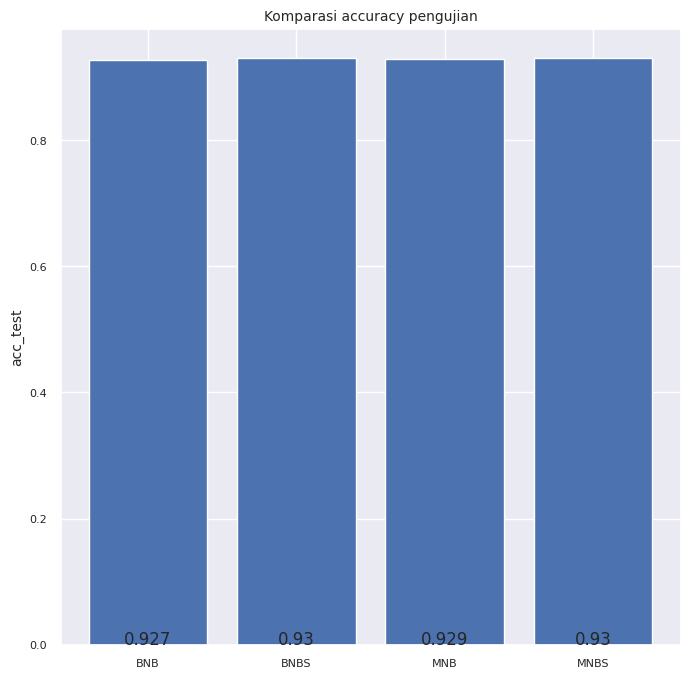

In [ ]:
plt.figure(figsize=(8,8))
plt.bar(list_model,list_score)

plt.title('Komparasi accuracy pengujian',size=10)
plt.ylabel('acc_test',size=10)
plt.yticks(size=8)
plt.xticks(size=8)

for i in range(len(list_model)):
  plt.text(i, y[i], list_score[i], ha = 'center')

plt.show()